# 설문결과 대시보드로 시각화 하기

## 데이터 불러오기

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
matplotlib.rcParams['font.family'] = 'AppleGothic' # 리눅스 돋움체 설정
matplotlib.rcParams['font.size'] = 15 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # - 마이너스 글꼴 오류 처리

In [5]:
df = pd.read_csv("data.csv")
df = df.dropna(subset=['학년'])
df['만족도'] = df['만족도'].map(lambda x: int(x))
df.head()

,시간,참관여부,학년,반,만족도,학부모 의견
0,2022. 4. 13 오후 12:12:54,"네, 참관하였습니다.",2학년,4반,4,NaN
1,2022. 4. 13 오후 12:13:04,"네, 참관하였습니다.",5학년,4반,4,NaN
2,2022. 4. 13 오후 12:13:05,"네, 참관하였습니다.",5학년,4반,4,NaN
3,2022. 4. 13 오후 12:13:05,"네, 참관하였습니다.",1학년,5반,3,NaN
4,2022. 4. 13 오후 12:13:09,"네, 참관하였습니다.",4학년,2반,3,NaN


In [49]:
# 칼럼에서 학년, 반 없애기
df['학년'] = df['학년'].map(lambda x: x[0])
df['반'] = df['반'].map(lambda x: x[0])

## 학급별 응답현황 - groupby

  학년       만족도
0  1  3.480000
1  2  3.676471
2  3  3.419355
3  4  3.511628
4  5  3.428571
5  6  3.619048


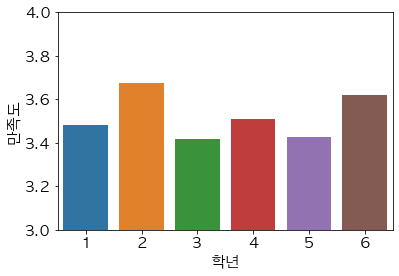

In [50]:
# 학년별 만족도 평균
grouped_test = df.groupby("학년").mean()
grouped_test = grouped_test.reset_index()
print(grouped_test)

# 그래프로 나타내기
sns.barplot(x=grouped_test.columns[0],
           y=grouped_test.columns[1],
            data=grouped_test,
           )
plt.ylim(3,4)
plt.show()

In [51]:
# 칼럼 숫자로 그룹짓기
grouped_grade = df.groupby(df.columns[2]).mean()

In [52]:
list(grouped_grade.index)

['1', '2', '3', '4', '5', '6']

In [53]:
# 학급별 만족도
grouped_classes = df.groupby(["학년", "반"]).mean()
grouped_classes = grouped_classes.reset_index()
grouped_classes['학급'] = grouped_classes['학년'] + grouped_classes['반']
grouped_classes.head()

,학년,반,만족도,학급
0,1,1,3.125000,11
1,1,2,3.571429,12
2,1,3,3.500000,13
3,1,4,3.777778,14
4,1,5,3.428571,15


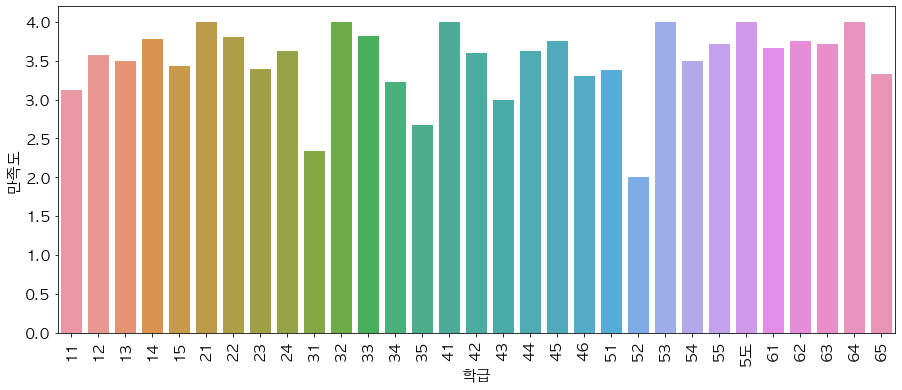

In [54]:
# 그래프로 나타내기
plt.figure(figsize=(15,6))
sns.barplot(x=grouped_classes.columns[3],
           y=grouped_classes.columns[2],
            data=grouped_classes,
           )
plt.ylim(0,4.2)
plt.xticks(rotation=90)
plt.show()

In [55]:
# 학년별 응답현황 카운트
df.groupby(["학년"]).size().reset_index(name="응답수")

,학년,응답수
0,1,50
1,2,34
2,3,31
3,4,43
4,5,28
5,6,21


In [56]:
# 학년별 응답현황 카운트
df.groupby(["학년",'반']).size().reset_index(name="응답수")[:5]

,학년,반,응답수
0,1,1,8
1,1,2,7
2,1,3,12
3,1,4,9
4,1,5,14


## 만족도 현황 시각화

In [57]:
df.head()

,시간,참관여부,학년,반,만족도,학부모 의견
0,2022. 4. 13 오후 12:12:54,"네, 참관하였습니다.",2,4,4,NaN
1,2022. 4. 13 오후 12:13:04,"네, 참관하였습니다.",5,4,4,NaN
2,2022. 4. 13 오후 12:13:05,"네, 참관하였습니다.",5,4,4,NaN
3,2022. 4. 13 오후 12:13:05,"네, 참관하였습니다.",1,5,3,NaN
4,2022. 4. 13 오후 12:13:09,"네, 참관하였습니다.",4,2,3,NaN


In [58]:
grouped_score = df.groupby("만족도").size().reset_index()
grouped_score.columns = ['만족도','인원']

In [59]:
grouped_score['만족도'] = grouped_score['만족도'].map(lambda x: int(x))
grouped_score

,만족도,인원
0,1,4
1,2,12
2,3,64
3,4,127


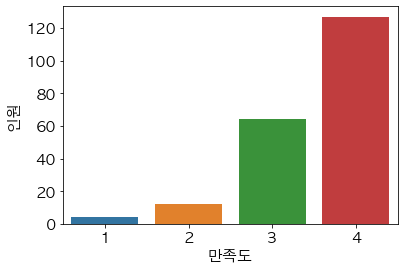

In [60]:
sns.barplot(x=grouped_score.columns[0],
           y=grouped_score.columns[1],
            data=grouped_score,
#             order=grouped_score['인원']
           )
# plt.ylim(3,4)
plt.show()

<AxesSubplot:xlabel='만족도', ylabel='count'>

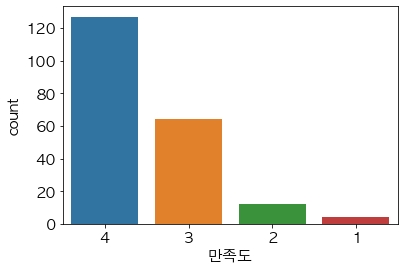

In [61]:
 sns.countplot(x = '만족도',
               data = df,
               order = df['만족도'].value_counts().index)

## 워드클라우드 변환

In [62]:
df_wordcloud = df.dropna(subset=['학부모 의견'])
df_wordcloud.head()

,시간,참관여부,학년,반,만족도,학부모 의견
12,2022. 4. 13 오후 12:13:22,"네, 참관하였습니다.",3,2,4,고생하셨습니다
16,2022. 4. 13 오후 12:13:36,"네, 참관하였습니다.",6,2,3,수고하셨습니다~~
17,2022. 4. 13 오후 12:13:36,"네, 참관하였습니다.",3,4,4,고생하셨습니다
19,2022. 4. 13 오후 12:13:49,"네, 참관하였습니다.",4,2,3,소리가 잘 안들렸지만 열심히 하는 모습이 보기 좋았습니다
21,2022. 4. 13 오후 12:13:53,"네, 참관하였습니다.",2,2,4,아이들이랑 선생님이랑 참여도 아주 좋아보였습니다


In [63]:
lst_lines = list(df_wordcloud['학부모 의견'])
lst_lines[:5]

['고생하셨습니다',
 '수고하셨습니다~~',
 '고생하셨습니다',
 '소리가 잘 안들렸지만 열심히 하는 모습이 보기 좋았습니다',
 '아이들이랑 선생님이랑 참여도 아주 좋아보였습니다']

In [64]:
lines = " ".join(lst_lines) #학부모 의견 말뭉치 생성 리스트 → 텍스트

In [65]:
# 말뭉치 처리 라이브러리 설치
from konlpy.tag import Okt
from collections import Counter

In [66]:
okt = Okt()

In [67]:
line = okt.pos(lines)

### 워드 클라우드
- 데이터프레임의 칼럼에서 데이터 추출하여 워드클라우드 만들기

In [25]:
from wordcloud import WordCloud, STOPWORDS

In [10]:
df_wordcloud = df.dropna(subset=['학부모 의견'])
words = ' '.join(df_wordcloud['학부모 의견'])
processed_words = ' '.join([word for word in words.split()])

my_stopwords = '비 더 도도 도 명 것 날 때 명 수 보 그 분 그 알 비 시 마 만 못 늘'
my_stopwords = set(my_stopwords.split(' '))

font="AppleGothic"
wordcloud = WordCloud(font_path= font, stopwords=my_stopwords, background_color='white', width=800, height=640, max_font_size=300).generate(processed_words)

([], [])

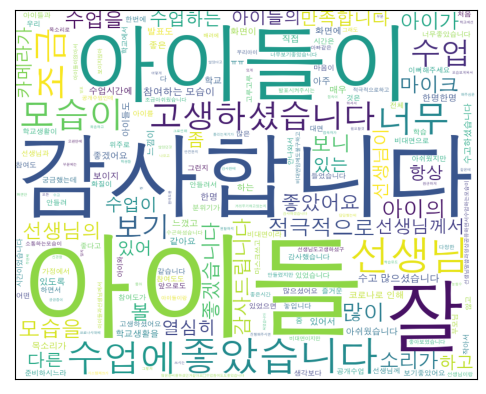

In [26]:
plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])